In [11]:
#Code for Figures 6 and 7

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import io
import scipy.io as sio
import pandas as pd
import os

In [12]:
#Write the path to the txt folder to be analysed 
folderpath= input("Simulation folder path?")

Simulation folder path?./COPASI_simulations/Li_2012_modelling/AMPARp(2.0s^-1)/scan1D_freq_kDphos2.0.txt


In [13]:
#Downloads the data from COPASI, into a table
df = pd.read_csv(folderpath, sep='\s+', index_col = False)

print(df.columns)

df

Index(['Values[spikeFrequency].InitialValue', 'Time', 'Values[AMPAR_bar]',
       'Values[CaMKII_active_ratio]', 'Values[CaMKII_active_total]',
       'Values[Dp_bar]', 'Values[k_AMPAR_phsophorylation]',
       'Values[k_AMPARp_dephosphorylation]', 'Values[PKA_bar]',
       'Values[PP1a_bar]', 'Values[PP1a_total]', 'Values[PP2B_bar]',
       'Values[PP2B_bound_total]', '[AMPAR]', '[CaMKIIp]', '[CaMKIIp_PP1a]',
       '[Ca]', '[Dp]'],
      dtype='object')


,Values[spikeFrequency].InitialValue,Time,Values[AMPAR_bar],Values[CaMKII_active_ratio],Values[CaMKII_active_total],Values[Dp_bar],Values[k_AMPAR_phsophorylation],Values[k_AMPARp_dephosphorylation],Values[PKA_bar],Values[PP1a_bar],Values[PP1a_total],Values[PP2B_bar],Values[PP2B_bound_total],[AMPAR],[CaMKIIp],[CaMKIIp_PP1a],[Ca],[Dp]
0,0.1,790.000,0.175631,0.033852,0.000002,0.693078,0.012968,0.060866,0.01,0.199263,3.985260e-07,0.035107,2.106410e-07,0.000001,7.201090e-11,3.195290e-11,1.010100e-08,4.331010e-07
1,0.1,790.001,0.175631,0.033852,0.000002,0.693078,0.012968,0.060866,0.01,0.199263,3.985260e-07,0.035107,2.106410e-07,0.000001,7.201090e-11,3.195290e-11,1.010100e-08,4.331010e-07
2,0.1,790.002,0.175631,0.033852,0.000002,0.693078,0.012968,0.060866,0.01,0.199263,3.985260e-07,0.035107,2.106410e-07,0.000001,7.201090e-11,3.195290e-11,1.010100e-08,4.331010e-07
3,0.1,790.003,0.175631,0.033852,0.000002,0.693078,0.012968,0.060866,0.01,0.199263,3.985260e-07,0.035107,2.106410e-07,0.000001,7.201090e-11,3.195290e-11,1.010100e-08,4.331010e-07
4,0.1,790.004,0.175631,0.033852,0.000002,0.693078,0.012968,0.060866,0.01,0.199263,3.985260e-07,0.035107,2.106410e-07,0.000001,7.201090e-11,3.195290e-11,1.010100e-08,4.331010e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19910006,200.0,2600.000,0.175632,0.033852,0.000002,0.693078,0.012968,0.060866,0.01,0.199263,3.985250e-07,0.035107,2.106410e-07,0.000001,7.201130e-11,3.195300e-11,1.010100e-08,4.331030e-07
19910007,200.0,2600.000,0.175632,0.033852,0.000002,0.693078,0.012968,0.060866,0.01,0.199263,3.985250e-07,0.035107,2.106410e-07,0.000001,7.201130e-11,3.195300e-11,1.010100e-08,4.331030e-07
19910008,200.0,2600.000,0.175632,0.033852,0.000002,0.693078,0.012968,0.060866,0.01,0.199263,3.985250e-07,0.035107,2.106410e-07,0.000001,7.201130e-11,3.195300e-11,1.010100e-08,4.331030e-07
19910009,200.0,2600.000,0.175632,0.033852,0.000002,0.693078,0.012968,0.060866,0.01,0.199263,3.985250e-07,0.035107,2.106410e-07,0.000001,7.201130e-11,3.195300e-11,1.010100e-08,4.331030e-07


In [14]:
#Select given columns to analyse, in this case activated CaMKII, calcineurin and PP1
#All values are normalized with respect to total amounts (bar value)
CaMKII_active_ratio = df['Values[CaMKII_active_ratio]'] 
PP2B_active_ratio = df['Values[PP2B_bar]'] 
PP1_active_bar = df['Values[PP1a_bar]'] 
AMPA_bar = df["Values[AMPAR_bar]"]
time = df["Time"]

#Compute time constants
simulation_t = time[df.shape[0]-1]-time[0]
dt = time[1]-time[0]

print(simulation_t)
print(dt)

1810.0
0.00100000000009004


In [15]:
#Only necessary to run for Figure 6

#Given an array of values, it separates them by the intial value of the parameter in the scan
def split_values(indices, values):
    values_matrix = np.reshape(np.array(values), (indices.shape[0],indices[1]), order = "C") #creates an empty matrix to add the values of the split array   
    return values_matrix

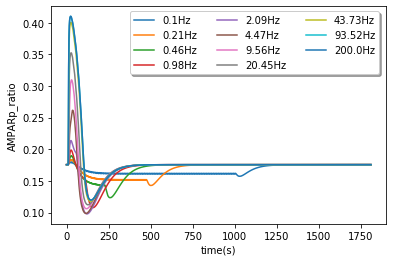

In [18]:
#Only run for Figure 6

#Figure 6A: computes the AMPAR phosphorylation ratio for a frequency scan 

df_AMPAR = split_values(indices_f, AMPA_bar)

labels = np.round(unique_f, decimals =2)

for i in range(indices_f.shape[0]):
    x = np.linspace(0, simulation_time, num = 2+simulation_time/dt)
    plt.plot(x, df_AMPAR[i],label=str(labels[i])+"Hz")
    

plt.xlabel('time(s)')
plt.ylabel('AMPARp_ratio')
plt.legend(loc='upper left', bbox_to_anchor=(0.22, 1), shadow=True, ncol=3)
plt.show()


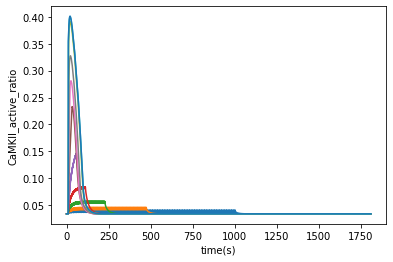

In [17]:
#Only run for Figure 6

#Figure 6B: computes CaMKIIa ratio for a frequency scan

df_CaMKII = split_values(indices_f, CaMKII_active_ratio)

labels = np.round(unique_f, decimals =2)

for i in range(indices_f.shape[0]):
    x = np.linspace(0, simulation_time, num = 2+simulation_time/dt)
    plt.plot(x, df_CaMKII[i])
    

plt.xlabel('time(s)')
plt.ylabel('CaMKII_active_ratio')
plt.show()


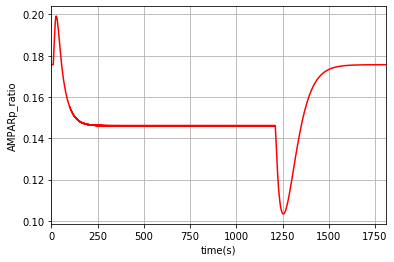

In [10]:
#Only run for Figure 7

#Figure 7 A-D: Plots AMPAR phosphorylation as a function of time for different LTP/LTD induction protocols


x = np.linspace(0, simulation_t, num = 2+simulation_t/dt)
plt.plot(x, AMPA_bar,"-r")
plt.xlabel('time(s)')
plt.ylabel('AMPARp_ratio')
plt.grid()
plt.margins(x=0)
plt.show()
